# BUSINESS UNDERSTANDING

## DESCRIBING THE QUESTION
### 1. SPECIFYING THE QUESTION
The objective was to establish that there is a positive relation between the Production Budget and the Gross Profit, and that when a good investment is made for a film, there will be favorable returns on that investment.


###  2. DEFINING THE METRIC FOR SUCCESS

A film is deemed successful when the returns will be more than the production budget and investment.


### 3. EXPERIMENTAL DESIGN

a) Loading Datasets and Preparing the Data.

b) Data Cleaning to deal with Anomalies and Outliers.

c) Exploratory Data Analysis 

d) Conclusions and Recommendation.


In [1]:
# For numerical operations in data analysis
import numpy as np
# For data analysis and data cleaning 
import pandas as pd
# To open zipped databases
import sqlite3
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA UNDERSTANDING

#### Loading data from the csv files from Box Office mojo

In [2]:
data_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression = 'gzip')
data_bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
# summary of what the data entails
data_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
data_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
data_bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [6]:
# numerical and statistical description of the data 

data_bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### Loading the csv file from The Numbers

In [7]:
data_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression = 'gzip')

In [8]:
data_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
data_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
data_tn.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


#### Loading data from the zipped file from imdb

In [11]:
imdb = sqlite3.connect("zippedData/im.db/im.db" )
imdb

In [12]:
cur = imdb.cursor()
cur.execute("""
SELECT name 
FROM sqlite_master 
WHERE type = 'table';
""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [13]:
### Overview of the tables in the imdb dataset
## Review of each of the tables

pd.read_sql("""
SELECT *
FROM 'movie_basics';
""",imdb).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
pd.read_sql("""
SELECT *
FROM 'movie_ratings';
""",imdb).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
pd.read_sql("""
SELECT *
FROM 'directors';
""",imdb).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [16]:
pd.read_sql("""
SELECT *
FROM 'known_for';
""",imdb).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [17]:
pd.read_sql("""
SELECT *
FROM 'movie_akas';
""",imdb).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [18]:
pd.read_sql("""
SELECT *
FROM 'writers';
""",imdb).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [19]:
pd.read_sql("""
SELECT *
FROM 'persons';
""",imdb).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [20]:
pd.read_sql("""
SELECT *
FROM 'principals';
""",imdb).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


## DATA PREPARATION

In [21]:
# join the movie_basics and movie_ratings to help draw insights

imdb_ratings_basics = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
""",imdb)
imdb_ratings_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [22]:
imdb_ratings_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [23]:
# join the directors and persons tables  to help draw insights

imdb_directors = pd.read_sql("""
SELECT primary_name, primary_title
FROM directors
JOIN persons
USING(person_id)
JOIN movie_basics
USING(movie_id)
""",imdb)
imdb_directors.head()

,primary_name,primary_title
0,Tony Vitale,Life's a Beach
1,Bill Haley,Steve Phoenix: The Untold Story
2,Jay Chandrasekhar,The Babymakers
3,Jay Chandrasekhar,The Babymakers
4,Albert Pyun,Bulletface


## DATA CLEANING

#### Data Cleaning in the Bom Dataset

Check for null values in the bom dataset

In [24]:
#there are null values

data_bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [25]:
## The foreign gross column dtype is object, we need to coerce the values to numeric
# in order to make analysis

def to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df[column_list]

In [26]:
to_numeric(data_bom, 'foreign_gross')

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [27]:
## Finding the data of the foreign gross column in the bom dataset 
#to fill the null values

foreign_gross_mode = data_bom.foreign_gross.mode()
print("The foreign gross mode is: " + str(foreign_gross_mode))
foreign_gross_median= data_bom.foreign_gross.median()
print("The foreign gross median is: " + str(foreign_gross_median))
foreign_gross_mean = data_bom.foreign_gross.mean()
print("The foreign gross mean is: " + str(foreign_gross_mean))

The foreign gross mode is: 0    1200000.0
Name: foreign_gross, dtype: float64
The foreign gross median is: 18900000.0
The foreign gross mean is: 75057041.62549213


In [28]:
# Replace the null foreign gross with the median

data_bom.foreign_gross.fillna(foreign_gross_median, inplace=True)

In [29]:
# Finding the mode of the domestic gross column in the bom dataset
domestic_gross_mode = data_bom.domestic_gross.mode()
print("The domestic gross mode is " + str(domestic_gross_mode))
domestic_gross_median = data_bom.domestic_gross.median()
print("The domestic gross median is " + str(domestic_gross_median))
domestic_gross_mean = data_bom.domestic_gross.mean()
print("The domestic gross mean is " + str(domestic_gross_mean))

The domestic gross mode is 0    1100000.0
Name: domestic_gross, dtype: float64
The domestic gross median is 1400000.0
The domestic gross mean is 28745845.06698422


In [30]:
# Replace the null foreign gross with the median

data_bom.domestic_gross.fillna(domestic_gross_median, inplace=True)

In [31]:
data_bom.isnull().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [32]:
# drop the remaining null values

data_bom.dropna(inplace = True)

In [33]:
# Are there any null values remaining?

data_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Finding outliers in the bom dataset

In [34]:
# Finding outliers in the bom dataset by defining a function

def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [35]:
find_outliers(data_bom).count()

## There are number of outliers 

C:\Users\HP\AppData\Local\Temp\ipykernel_2720\1615461570.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


title               0
studio              0
domestic_gross    408
foreign_gross     619
year                0
dtype: int64

In [36]:
# there are no duplicated values in the dataset

data_bom.duplicated().sum()

0

#### Data Cleaning the imdb set

In [37]:
## to ensure consistency, make sure the columns are uniform and readable

imdb_ratings_basics.columns = imdb_ratings_basics.columns.str.lower().str.replace('averagerating', 'average_rating')
imdb_ratings_basics.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77


In [38]:
imdb_ratings_basics.columns = imdb_ratings_basics.columns.str.lower().str.replace('numvotes', 'num_votes')
imdb_ratings_basics.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77


Check if there are null values in the dataset

In [39]:
imdb_ratings_basics.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
average_rating        0
num_votes             0
dtype: int64

In [40]:
# There are null values in the runtime minutes and genres columns

imdb_ratings_basics.shape

(73856, 8)

In [41]:
# Replace the missing values in the genres column with 'Missing'

imdb_ratings_basics['genres'].fillna('Missing', inplace=True)

In [42]:
# Drop the remaining missing values in the runtime minutes

imdb_ratings_basics.dropna(inplace=True)

In [43]:
imdb_ratings_basics.isnull().sum()

# There are no more null values present

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
average_rating     0
num_votes          0
dtype: int64

In [44]:
# There are no duplicated values in the dataset

imdb_ratings_basics.duplicated().sum()

0

In [45]:
# Find if there are any outliers

find_outliers(imdb_ratings_basics).count()

C:\Users\HP\AppData\Local\Temp\ipykernel_2720\1615461570.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
average_rating      1327
num_votes          10472
dtype: int64

There are a number of outliers and they will be ignored inorder to not affect the data 

#### Data Understanding and Cleaning of the budget set 

In [46]:
data_tn.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [47]:
## we need to change the data types to numerical form so as to make data analysis

data_tn['production_budget'] = data_tn['production_budget'].str.replace(',', '').str.replace('$', '').astype('int64')
data_tn['domestic_gross'] = data_tn['domestic_gross'].str.replace(',', '').str.replace('$', '').astype('int64')
data_tn['worldwide_gross'] = data_tn['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype('int64')

C:\Users\HP\AppData\Local\Temp\ipykernel_2720\675727129.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_tn['production_budget'] = data_tn['production_budget'].str.replace(',', '').str.replace('$', '').astype('int64')
C:\Users\HP\AppData\Local\Temp\ipykernel_2720\675727129.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_tn['domestic_gross'] = data_tn['domestic_gross'].str.replace(',', '').str.replace('$', '').astype('int64')
C:\Users\HP\AppData\Local\Temp\ipykernel_2720\675727129.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal

In [48]:
data_tn.info()

## the worldwide_gross data did not change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [49]:
data_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [50]:
data_tn.isnull().sum()

## There are no null values in the dataset!

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [51]:
data_tn.duplicated().sum()

## There are no duplicated values in the dataset

0

## DATA ANALYSIS

## Exploratory Data Analysis

### 1. Univariate Data Analysis

#### Data Analysis of the BOM dataset

a) Numerical data

In [52]:
data_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


Plotting boxplots for outliers

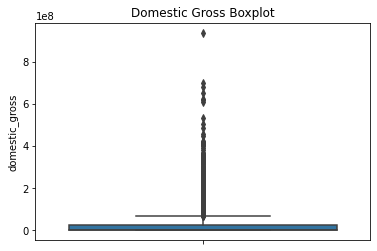

In [53]:

fig, ax = plt.subplots()
sns.boxplot(y = data_bom['domestic_gross'])
ax.set_title('Domestic Gross Boxplot')
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

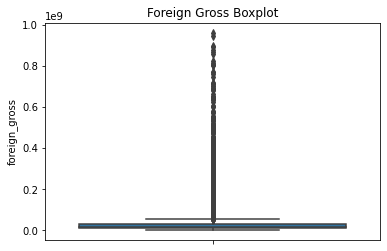

In [54]:

fig, ax = plt.subplots()
sns.boxplot(y = data_bom['foreign_gross'])
ax.set_title('Foreign Gross Boxplot')
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

In [55]:
print("Domestic Gross outliers are " + str(find_outliers(data_bom.domestic_gross).count()))
print("Foreign Gross outliers are " + str(find_outliers(data_bom.foreign_gross).count()))

Domestic Gross outliers are 408
Foreign Gross outliers are 619


From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

Microsoft must understand its rivals and how to navigate and penetrate the market if it wants to succeed in the movie business.
Here, we observe that Universal and IFC Film Company make the most movies.

#### Measures of Central Tendencies

In [56]:
#mean
print('The domestic gross mean is: ' + str(data_bom.domestic_gross.mean()))
print('The foreign gross mean is: ' + str(data_bom.foreign_gross.mean()))

# 

The domestic gross mean is: 28561064.15730337
The foreign gross mean is: 52623864.15819042


In [57]:
# mode
print('The domestic gross mode is: ' + str(data_bom.domestic_gross.mode()))
print('The foreign gross mode is: ' + str(data_bom.foreign_gross.mode()))
print('The modal studio is: ' + str(data_bom.studio.mode()))
print('The modal title is: ' + str(data_bom.title.mode()))
print('The modal year is: ' + str(data_bom.year.mode()))

# 

The domestic gross mode is: 0    1400000.0
Name: domestic_gross, dtype: float64
The foreign gross mode is: 0    18900000.0
Name: foreign_gross, dtype: float64
The modal studio is: 0    IFC
Name: studio, dtype: object
The modal title is: 0    Bluebeard
Name: title, dtype: object
The modal year is: 0    2015
Name: year, dtype: int64


In [58]:
# median
print('The domestic gross median is: ' + str(data_bom.domestic_gross.median()))
print('The foreign gross median is: ' + str(data_bom.foreign_gross.median()))


The domestic gross median is: 1400000.0
The foreign gross median is: 18900000.0


In [59]:
# range
print('The range of domestic gross is :' + str((data_bom.domestic_gross.max() - data_bom.domestic_gross.min())))
print('The range of domestic gross is :' + str((data_bom.foreign_gross.max() - data_bom.foreign_gross.min())))


The range of domestic gross is :936699900.0
The range of domestic gross is :960499400.0


In [60]:
# Standard Deviation
print('The standard deviation of the Domestic gross is: ' + str(data_bom.domestic_gross.std()))
print('The standard deviation of the Foreign gross is: ' + str(data_bom.foreign_gross.std()))


The standard deviation of the Domestic gross is: 66791614.60103198
The standard deviation of the Foreign gross is: 110074384.7187505


In [61]:
# Variance
print('The variance of the Domestic gross is: ' + str(data_bom.domestic_gross.var()))
print('The variance of the Foreign gross is: ' + str(data_bom.foreign_gross.var()))

##

The variance of the Domestic gross is: 4461119781012789.0
The variance of the Foreign gross is: 1.2116370171211496e+16


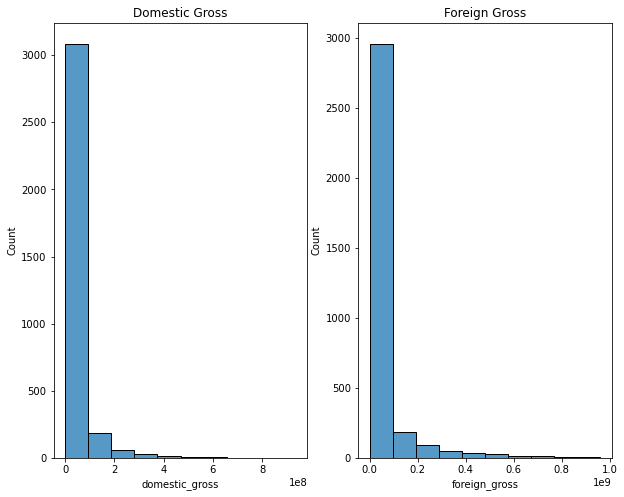

In [62]:
# Plotting Histogram to show the above

n_bins = 10

fig, (ax1,ax2) = plt.subplots(1,2, figsize= (10,8))

sns.histplot(data_bom.domestic_gross, ax=ax1, bins= n_bins)
ax1.set_title('Domestic Gross')
sns.histplot(data_bom.foreign_gross, ax=ax2, bins= n_bins)
ax2.set_title('Foreign Gross');

## From the histogram we can see that the data is right skewed and the distribution has a heavy tail and a higher peak
# and a positive kurtosis

b) Categorical data

In [63]:
studios_movies = data_bom.studio.value_counts().head(10)
studios_movies

## The number of movies produced by a studio

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

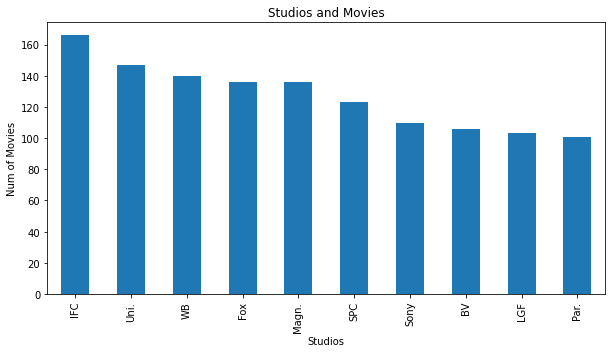

In [64]:
fig, ax = plt.subplots( figsize = (10,5))
ax.set_title("Studios and Movies")
plt.xlabel("Studios")
plt.ylabel("Num of Movies")
studios_movies.plot.bar();

From the chart baove, the IFC film company has produced the most films

In [65]:
# Which year had the most movie releases
year_movies = data_bom['year'].value_counts().head(10)
year_movies

2015    450
2016    436
2012    399
2011    398
2014    394
2013    350
2010    327
2017    320
2018    308
Name: year, dtype: int64

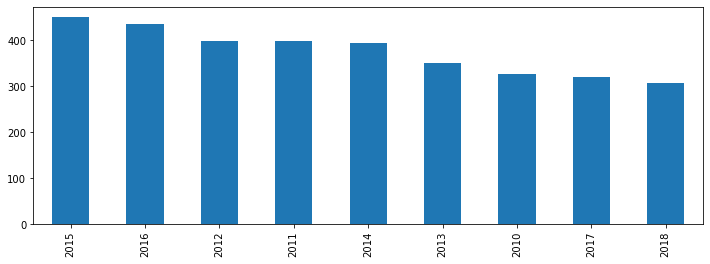

In [66]:
data_bom['year'].value_counts().head(10).plot.bar(figsize=(12,4));

## 2015 had the most movie releases

#### Data Analysis of the imdb dataset

a) Numerical Data

In [67]:
imdb_ratings_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           66236 non-null  object 
 6   average_rating   66236 non-null  float64
 7   num_votes        66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [68]:
imdb_ratings_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [69]:
# Find if there are any outliers

find_outliers(imdb_ratings_basics).count()


C:\Users\HP\AppData\Local\Temp\ipykernel_2720\1615461570.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
average_rating      1327
num_votes          10472
dtype: int64

From the below results, there are many outliers and we can't replace because might be affect our data analysis substantially 

In [70]:
imdb_ratings_basics.describe()

,start_year,runtime_minutes,average_rating,num_votes
count,66236.000000,66236.000000,66236.000000,6.623600e+04
mean,2014.252687,94.654040,6.321925,3.924085e+03
std,2.600352,208.574111,1.458443,3.196486e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.100000e+01
75%,2016.000000,104.000000,7.300000,3.470000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [71]:
# mean
print("The average run time minutes of a movie is: " + str(imdb_ratings_basics.runtime_minutes.mean()))
print("The average number of votes is: " + str(imdb_ratings_basics.num_votes.mean()))


## The average time that movies run for is 95 minutes

The average run time minutes of a movie is: 94.6540400990398
The average number of votes is: 3924.0854067274595


In [72]:
# mode 
print("The modal run time minutes of movies is: " + str(imdb_ratings_basics.runtime_minutes.mode()))
print("The modal rating is: " + str(imdb_ratings_basics.average_rating.mode()))
print("The modal genre is: " + str(imdb_ratings_basics.genres.mode()))

## The common genre is Drama
## The common rating that was made from the movies is 7.0

The modal run time minutes of movies is: 0    90.0
Name: runtime_minutes, dtype: float64
The modal rating is: 0    7.0
Name: average_rating, dtype: float64
The modal genre is: 0    Drama
Name: genres, dtype: object


b)Categorical Data

In [73]:
# The genres that are produced the most?

imdb_ratings_basics.genres.value_counts().head()

Drama           10189
Documentary      9149
Comedy           4604
Comedy,Drama     2451
Horror           2232
Name: genres, dtype: int64

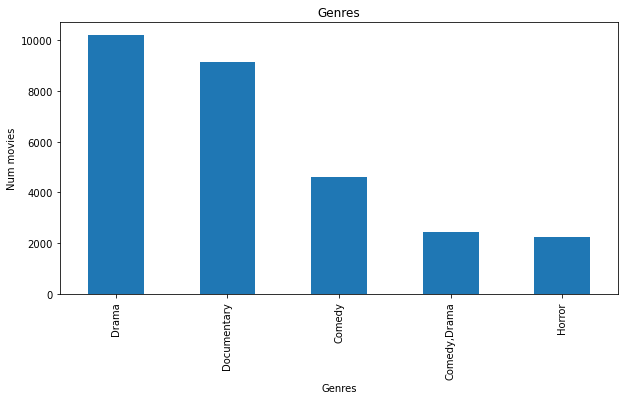

In [74]:
fig, ax = plt.subplots( figsize = (10,5))
imdb_ratings_basics.genres.value_counts().head().plot.bar()
ax.set_title("Genres")
plt.xlabel("Genres")
plt.ylabel("Num movies");

## Drama, Documentary, Comedy genres are produced the most

In [75]:
# the titles with the highest ratings

sorted_rating = imdb_ratings_basics.sort_values('average_rating', ascending = False)
sorted_rating.head()

## The genres with the highest ratings are Documentaries with ratings of 10.0

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
50085,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8
64646,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
60782,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5
53689,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5


In [76]:
### Trend of the average runtime minutes of movies over the years

avgminutes = pd.read_sql("""
SELECT start_year, AVG(runtime_minutes)
FROM 'movie_basics'
GROUP BY start_year;
""",imdb)
avgminutes.head()

,start_year,AVG(runtime_minutes)
0,2010,85.495694
1,2011,86.410106
2,2012,89.208856
3,2013,84.931670
4,2014,84.541500


From the data above we see that the average runtime minutes of movies did not change much over the years.

In [77]:
imdb_directors.head()

,primary_name,primary_title
0,Tony Vitale,Life's a Beach
1,Bill Haley,Steve Phoenix: The Untold Story
2,Jay Chandrasekhar,The Babymakers
3,Jay Chandrasekhar,The Babymakers
4,Albert Pyun,Bulletface


In [78]:
imdb_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291171 entries, 0 to 291170
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_name   291171 non-null  object
 1   primary_title  291171 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


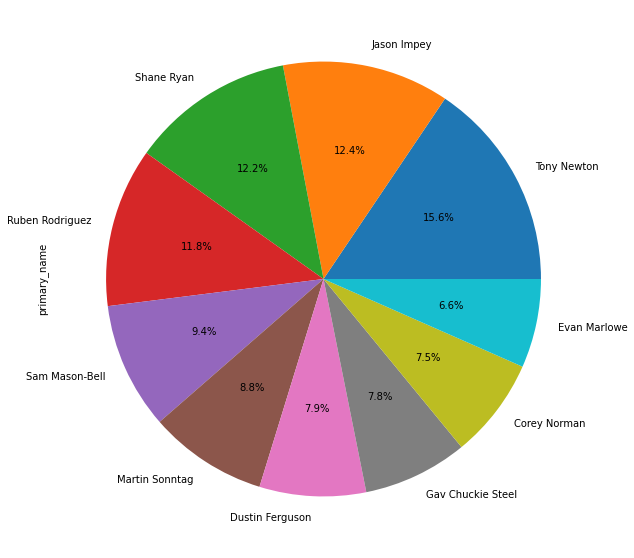

In [79]:
# The Top 10 directors in the industry

imdb_directors.primary_name.value_counts().head(10).plot.pie(autopct='%1.1f%%',figsize=(10,10));

The Directors that have produced the most movies are Tony Newton(15.6%), Jason Impey(12.4%) then Shane Ryan(12.2%)

#### Data Analysis of the The Numbers  dataset

a) Numerical data

In [80]:
find_outliers(data_tn).count()

C:\Users\HP\AppData\Local\Temp\ipykernel_2720\1615461570.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


id                     0
release_date           0
movie                  0
production_budget    431
domestic_gross       463
worldwide_gross      604
dtype: int64

There are a number of outliers and stripping them might affect our data.

In [81]:
## Adding a new column and showing the profit from the difference between the bdget and the profit

data_tn['gross_profit'] = data_tn.worldwide_gross - data_tn.production_budget

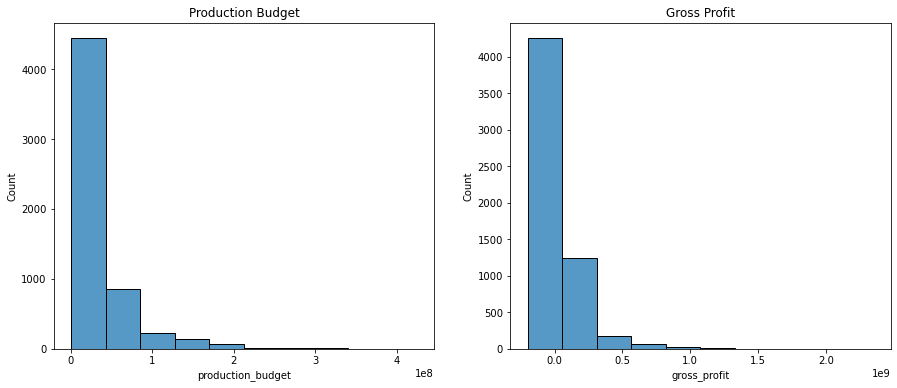

In [82]:
n_bins = 10

fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

sns.histplot(data_tn.production_budget, ax=ax1, bins= n_bins)
ax1.set_title('Production Budget')
sns.histplot(data_tn.gross_profit, ax=ax2, bins= n_bins)
ax2.set_title('Gross Profit');

## From the histogram we can see that the data is right skewed and the distribution has a heavy tail and a higher peak
# and a positive kurtosis

b) Categorical Data

In [83]:
data_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


From the above, we see that the month of May had the most movie releases.

In [84]:
### The most common values in the dataset by finding the mode

movie_mode = data_tn.movie.mode()
print("the modal movie is " + str(movie_mode))
budget_mode = data_tn.production_budget.mode()
print("The modal budget is " + str(budget_mode))
gross_mode = data_tn.gross_profit.mode()
print("The modal gross profit " + str(gross_mode))

the modal movie is 0    Halloween
1         Home
2    King Kong
Name: movie, dtype: object
The modal budget is 0    20000000
Name: production_budget, dtype: int64
The modal gross profit 0   -1000000
Name: gross_profit, dtype: int64


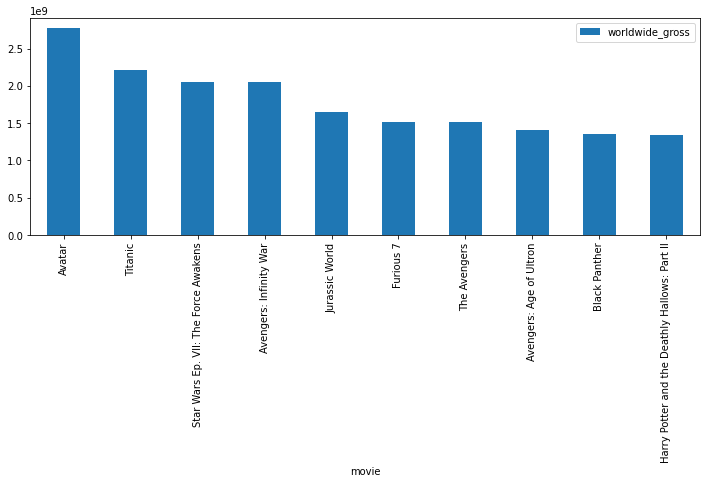

In [85]:
##The highest grossing films by the World wide gross
top10 = data_tn.nlargest(10,'worldwide_gross')
top10.index = top10.movie
top10[['movie','worldwide_gross']].plot.bar(figsize=(12,4));

In [86]:
data_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


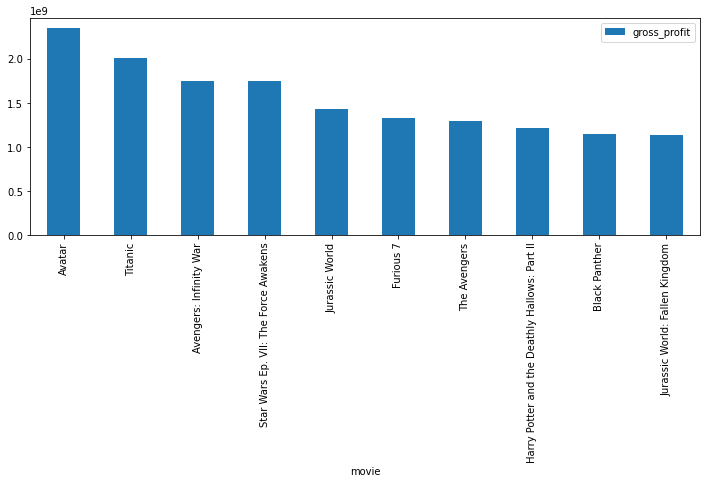

In [87]:
## Top 10 Highest grossing films by the gross profit

top10 = data_tn.nlargest(10,'gross_profit')
top10.index = top10.movie
top10[['movie','gross_profit']].plot.bar(figsize=(12,4));


The datasets above do not contain the exact data, this means that there are movies that did not make more than was invested in the production budget

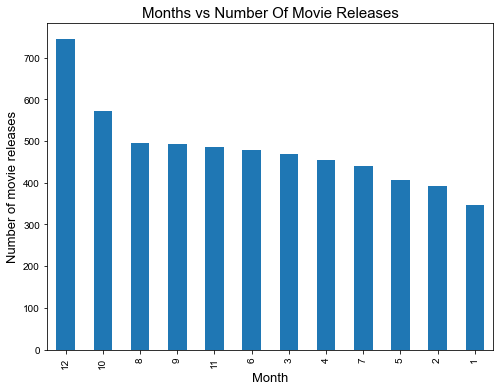

In [88]:
## The month that has the most movie releases in a year

data_tn['month'] = pd.DatetimeIndex(data_tn['release_date']). month
release_month= data_tn['month'].value_counts()
release_month.plot(kind='bar', figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid");

The month with the most movie releases is December(month 12) with a total of 745 releases over the years

### 2. Bivariate Analysis

In [89]:
imdb_ratings_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [90]:
imdb_ratings_basics.groupby('start_year').mean()['runtime_minutes']

start_year
2010     92.522046
2011     94.183821
2012     99.269825
2013     92.437706
2014     93.336053
2015     93.449929
2016     93.744483
2017     94.838040
2018     96.970348
2019    100.156267
Name: runtime_minutes, dtype: float64

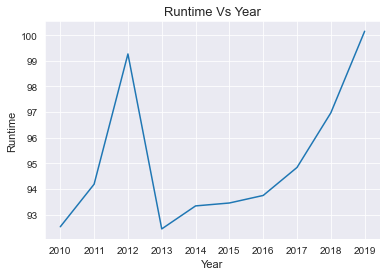

In [91]:
#how the runtime of the movies differ year to year.

#make the group of the data according to their release_year and find the mean  related to this and plot.
imdb_ratings_basics.groupby('start_year').mean()['runtime_minutes'].plot(xticks = np.arange(2010,2020,1))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 13)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 11)
plt.ylabel('Runtime',fontsize = 11)
sns.set_style("whitegrid")

From the graph above, the runtime minutes of movies were high then decreased then went back up. The average of run time of movies is about 100 mintes over the entire decade.

In [92]:
data_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


Correlation Between Gross Profit And Budget :  0.6087521471718812


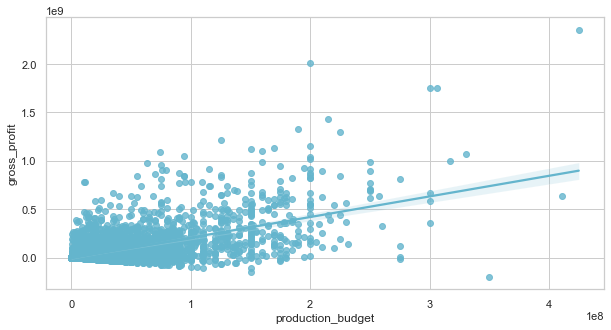

In [93]:
ax = sns.regplot(x=data_tn['production_budget'], y=data_tn['gross_profit'],color='c');
data_corr = data_tn.corr()
print("Correlation Between Gross Profit And Budget : ",data_corr.loc['production_budget','gross_profit'])

The Correlation between Gross Profit and Budget is 0.6 which is a moderate positive correlation which means there is a good possibility that movies with higher investments may result in better revenues.

## RECOMMENDATIONS

-The findings of the study presented above lead one to the conclusion that there is, in fact, a positive link between the production budget and the gross profit. 

-The top three directors at Microsoft are Tony Newton (15.6%), Jason Impey (12.4%), and Shane Ryan (12.2%), and the company will need to recruit all three of them.

-When getting started, there is one more element that should be taken into account, and that is the run time minutes of movies. Over the last ten years, the typical run length of a movie has been between 80 and 100 minutes.